In [1]:
from platform import python_version
python_version()

'3.10.4'

In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf

import data_transformer as dataTransformer
from Utils_Python.database_connector.DatabaseConnector import DatabaseConnector
from Utils_Python.file_writer.FileWriter import FileWriter
from Utils_Python.file_reader.FileReader import FileReader

In [6]:
POINT_IN_A_DAY = 96
ADJUSTER = 2.103
ROW_COUNT = (POINT_IN_A_DAY * 5 * 2) * ADJUSTER  # (Points in 1 day * Number of Days * Number of Weeks) * n
DATABASE_NAME = 'IG_TRADING'
SCHEMA_NAME = 'FOREX_MINI'
TABLE_NAME = 'GBPUSD_15MIN'
DATA_PATH = '/ScalpFX/src/data'
MODEL_PATH = '/ScalpFX/src/models'

In [7]:
TMP_DATA_PATH = '/ScalpFX/src/data/tmp_df.pkl'
TMP_DF_PATH = '/ScalpFX/src/data/tmp_df.pkl'
TMP_TRANS_PATH = '/ScalpFX/src/data/tmp_trans.pkl'
TMP_NORM_PATH = '/ScalpFX/src/data/tmp_norm.pkl'
TMP_PREP_PATH = '/ScalpFX/src/data/tmp_prep.json'

In [8]:
def closeDatabaseConnection(databaseConnector, cur, connObject):
    cur.close()
    databaseConnector.closeConnection(connObject)

In [9]:
# def getTrainingData(filePathToWrite, connTag, verbose=False):
filePathToWrite = TMP_DATA_PATH
connTag = "PostgresqlIgTrading"
verbose = False

databaseConnector = DatabaseConnector()
connObject = databaseConnector.openConnection(connTag)
conn = connObject['connection']
cur = conn.cursor()

query = (   
            f"SELECT * "
            f"FROM \"{DATABASE_NAME}\".\"{SCHEMA_NAME}\".\"{TABLE_NAME}\" "
            f"ORDER BY datetime DESC "
            f"LIMIT {ROW_COUNT}"
        )

colNames = None
try:
    cur.execute(query)
    colNames = [desc[0] for desc in cur.description]
except Exception as e:
    closeDatabaseConnection(databaseConnector, cur, connObject)
    raise Exception(f"Could not execute: {query}\n{e}")

res = cur.fetchall()    
closeDatabaseConnection(databaseConnector, cur, connObject)

df = pd.DataFrame(res, columns=colNames)
df = df.sort_values(['datetime'], ascending=True).reset_index()

if verbose:
    print('getTrainingData()')
    print(f"{df}\n")

df.to_pickle(filePathToWrite)
print(f"Training Data has been saved to '{filePathToWrite}'\n")


df

Successfully connect to 'PostgresqlIgTrading' database, with connection ID 'PostgresqlIgTrading_SDkVJ8k2'!
Successfully close the 'PostgresqlIgTrading_SDkVJ8k2' connection!
Training Data has been saved to '/ScalpFX/src/data/tmp_df.pkl'



,index,datetime,open,high,low,close,volume,inserted_on_myt
0,2018,2022-06-07 00:00:00,1.25442,1.25451,1.25364,1.25367,2048,NaT
1,2017,2022-06-07 00:15:00,1.25373,1.25400,1.25278,1.25283,1648,NaT
2,2016,2022-06-07 00:30:00,1.25282,1.25331,1.25256,1.25319,1692,NaT
3,2015,2022-06-07 00:45:00,1.25320,1.25413,1.25311,1.25399,1605,NaT
4,2014,2022-06-07 01:00:00,1.25398,1.25409,1.25345,1.25367,1535,NaT
...,...,...,...,...,...,...,...,...
2014,4,2022-07-05 19:45:00,1.20010,1.20058,1.19966,1.20005,2788,2022-07-05 20:00:17
2015,3,2022-07-05 20:00:00,1.20004,1.20010,1.19841,1.19867,3618,2022-07-05 20:16:16
2016,2,2022-07-05 20:15:00,1.19868,1.19897,1.19772,1.19774,3363,2022-07-05 20:32:18
2017,1,2022-07-05 20:30:00,1.19775,1.19784,1.19638,1.19686,3758,2022-07-05 20:48:18


In [10]:
# def removeColumns(filePathToRead, filePathToWrite, columnNames, verbose=False):
filePathToRead = TMP_DF_PATH
filePathToWrite = TMP_DF_PATH
columnNames = ['index', 'datetime', 'inserted_on_myt']
verbose = False

df = pd.read_pickle(filePathToRead)

# df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
working_df = df.drop(columns=columnNames)

if verbose:
    print('removeColumns()')
    print(f"{working_df}\n")

working_df.to_pickle(filePathToWrite)
print(f"Removed Columns' Training Data has been saved to '{filePathToWrite}'\n")


working_df

Removed Columns' Training Data has been saved to '/ScalpFX/src/data/tmp_df.pkl'



,open,high,low,close,volume
0,1.25442,1.25451,1.25364,1.25367,2048
1,1.25373,1.25400,1.25278,1.25283,1648
2,1.25282,1.25331,1.25256,1.25319,1692
3,1.25320,1.25413,1.25311,1.25399,1605
4,1.25398,1.25409,1.25345,1.25367,1535
...,...,...,...,...,...
2014,1.20010,1.20058,1.19966,1.20005,2788
2015,1.20004,1.20010,1.19841,1.19867,3618
2016,1.19868,1.19897,1.19772,1.19774,3363
2017,1.19775,1.19784,1.19638,1.19686,3758


In [11]:
# def transformData(filePathToRead, filePathToWrite, verbose=False):
filePathToRead = TMP_DF_PATH
filePathToWrite = TMP_TRANS_PATH
verbose = False

df = pd.read_pickle(filePathToRead)

working_df = dataTransformer.calcFeaturesEngineering(df, verbose=verbose)
working_df = dataTransformer.calcTA(working_df, verbose=verbose)
working_df = working_df.reset_index()
working_df = working_df.drop(['index'], axis = 1)

working_df.to_pickle(filePathToWrite)
print(f"Transformed Data has been saved to '{filePathToWrite}'\n")

working_df

C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\zaimp\anaconda3\envs\ScalpFX\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


Transformed Data has been saved to '/ScalpFX/src/data/tmp_trans.pkl'



,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,1.25930,1.25954,1.25911,1.25933,1644,0.00024,0.00019,0.00021,0.00022,0.00043,...,25.425546,1.257593,1.251150,1.251778,96.879539,0.032355,0.853881,0.651663,1.505545,1.258615
1,1.25935,1.25938,1.25862,1.25874,1743,0.00003,0.00073,0.00064,0.00012,0.00076,...,25.366095,1.258140,1.251339,1.251829,48.439769,0.032761,0.875250,0.573716,1.448966,1.258792
2,1.25875,1.25894,1.25841,1.25852,1316,0.00019,0.00034,0.00042,0.00011,0.00053,...,25.168260,1.258522,1.251525,1.251886,24.219885,0.032538,0.834802,0.632893,1.467695,1.258850
3,1.25849,1.25888,1.25810,1.25857,1223,0.00039,0.00039,0.00031,0.00047,0.00078,...,25.006468,1.258716,1.251729,1.251939,12.109942,0.031844,0.606557,0.784297,1.390854,1.258858
4,1.25855,1.25866,1.25752,1.25753,1318,0.00011,0.00103,0.00113,0.00001,0.00114,...,24.916859,1.258676,1.251944,1.251975,6.054971,0.030490,0.159156,0.976031,1.135187,1.258675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1.20010,1.20058,1.19966,1.20005,2788,0.00048,0.00044,0.00053,0.00039,0.00092,...,29.651959,1.202545,1.208498,1.210190,13.460914,-0.031322,-0.667630,1.399422,0.731792,1.201659
1916,1.20004,1.20010,1.19841,1.19867,3618,0.00006,0.00163,0.00143,0.00026,0.00169,...,29.600516,1.201973,1.208241,1.210024,7.896860,-0.032422,-0.647392,1.314059,0.666667,1.201063
1917,1.19868,1.19897,1.19772,1.19774,3363,0.00029,0.00096,0.00123,0.00002,0.00125,...,29.482003,1.201450,1.207968,1.209843,4.517097,-0.033689,-0.756725,1.394152,0.637427,1.200412
1918,1.19775,1.19784,1.19638,1.19686,3758,0.00009,0.00137,0.00098,0.00048,0.00146,...,29.328925,1.200840,1.207675,1.209654,2.528348,-0.035121,-0.811819,1.396443,0.584624,1.199705


In [12]:
# def normalisedDataframe(filePathToRead, filePathToWrite, verbose=False):
filePathToRead = TMP_TRANS_PATH
filePathToWrite = TMP_NORM_PATH
verbose = False

df = pd.read_pickle(filePathToRead)

working_df = dataTransformer.normalised(df, mode='train')

if verbose:
    print('normalisedDataframe()')
    print(f"{working_df}\n")

working_df.to_pickle(filePathToWrite)
print(f"Normalised Data has been saved to '{filePathToWrite}'\n")

working_df

Normalised Data has been saved to '/ScalpFX/src/data/tmp_norm.pkl'



,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.990615,0.993020,0.992152,0.990933,0.215730,0.023976,0.016667,0.017573,0.019486,0.035016,...,0.396426,0.972833,0.871321,0.905302,0.968795,0.663054,0.987661,0.086675,0.966443,0.988930
1,0.991397,0.990482,0.984757,0.981710,0.228729,0.002997,0.064035,0.053556,0.010629,0.061889,...,0.391954,0.981771,0.874555,0.906242,0.484398,0.666491,1.000000,0.000000,0.911722,0.991804
2,0.982012,0.983503,0.981588,0.978271,0.172663,0.018981,0.029825,0.035146,0.009743,0.043160,...,0.377071,0.988011,0.877759,0.907297,0.242199,0.664606,0.976645,0.065803,0.929835,0.992756
3,0.977945,0.982551,0.976909,0.979053,0.160452,0.038961,0.034211,0.025941,0.041630,0.063518,...,0.364899,0.991185,0.881258,0.908294,0.121099,0.658737,0.844854,0.234158,0.855517,0.992878
4,0.978883,0.979061,0.968156,0.962795,0.172925,0.010989,0.090351,0.094561,0.000886,0.092834,...,0.358158,0.990531,0.884942,0.908951,0.060550,0.647295,0.586520,0.447360,0.608243,0.989905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.064602,0.057741,0.094929,0.064249,0.365940,0.047952,0.038596,0.044351,0.034544,0.074919,...,0.714377,0.072848,0.139760,0.134306,0.134609,0.124837,0.109125,0.918155,0.218090,0.060999
1916,0.063663,0.050127,0.076064,0.042676,0.474921,0.005994,0.142982,0.119665,0.023029,0.137622,...,0.710507,0.063489,0.135348,0.131229,0.078969,0.115541,0.120811,0.823235,0.155102,0.051286
1917,0.042390,0.032202,0.065650,0.028138,0.441439,0.028971,0.084211,0.102929,0.001771,0.101792,...,0.701591,0.054946,0.130679,0.127875,0.045171,0.104831,0.057681,0.912295,0.126822,0.040678
1918,0.027843,0.014277,0.045427,0.014382,0.493304,0.008991,0.120175,0.082008,0.042516,0.118893,...,0.690075,0.044973,0.125647,0.124369,0.025283,0.092728,0.025869,0.914843,0.075753,0.029173


In [13]:
filePathToRead = TMP_NORM_PATH

df = pd.read_pickle(filePathToRead)
df

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.990615,0.993020,0.992152,0.990933,0.215730,0.023976,0.016667,0.017573,0.019486,0.035016,...,0.396426,0.972833,0.871321,0.905302,0.968795,0.663054,0.987661,0.086675,0.966443,0.988930
1,0.991397,0.990482,0.984757,0.981710,0.228729,0.002997,0.064035,0.053556,0.010629,0.061889,...,0.391954,0.981771,0.874555,0.906242,0.484398,0.666491,1.000000,0.000000,0.911722,0.991804
2,0.982012,0.983503,0.981588,0.978271,0.172663,0.018981,0.029825,0.035146,0.009743,0.043160,...,0.377071,0.988011,0.877759,0.907297,0.242199,0.664606,0.976645,0.065803,0.929835,0.992756
3,0.977945,0.982551,0.976909,0.979053,0.160452,0.038961,0.034211,0.025941,0.041630,0.063518,...,0.364899,0.991185,0.881258,0.908294,0.121099,0.658737,0.844854,0.234158,0.855517,0.992878
4,0.978883,0.979061,0.968156,0.962795,0.172925,0.010989,0.090351,0.094561,0.000886,0.092834,...,0.358158,0.990531,0.884942,0.908951,0.060550,0.647295,0.586520,0.447360,0.608243,0.989905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.064602,0.057741,0.094929,0.064249,0.365940,0.047952,0.038596,0.044351,0.034544,0.074919,...,0.714377,0.072848,0.139760,0.134306,0.134609,0.124837,0.109125,0.918155,0.218090,0.060999
1916,0.063663,0.050127,0.076064,0.042676,0.474921,0.005994,0.142982,0.119665,0.023029,0.137622,...,0.710507,0.063489,0.135348,0.131229,0.078969,0.115541,0.120811,0.823235,0.155102,0.051286
1917,0.042390,0.032202,0.065650,0.028138,0.441439,0.028971,0.084211,0.102929,0.001771,0.101792,...,0.701591,0.054946,0.130679,0.127875,0.045171,0.104831,0.057681,0.912295,0.126822,0.040678
1918,0.027843,0.014277,0.045427,0.014382,0.493304,0.008991,0.120175,0.082008,0.042516,0.118893,...,0.690075,0.044973,0.125647,0.124369,0.025283,0.092728,0.025869,0.914843,0.075753,0.029173


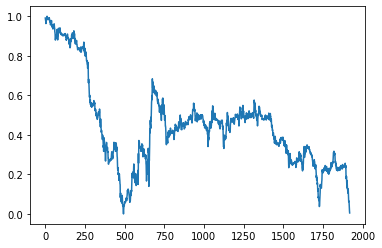

In [14]:
plt.plot(df.index, df['close'])

In [15]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [16]:
train_df

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
0,0.990615,0.993020,0.992152,0.990933,0.215730,0.023976,0.016667,0.017573,0.019486,0.035016,...,0.396426,0.972833,0.871321,0.905302,0.968795,0.663054,0.987661,0.086675,0.966443,0.988930
1,0.991397,0.990482,0.984757,0.981710,0.228729,0.002997,0.064035,0.053556,0.010629,0.061889,...,0.391954,0.981771,0.874555,0.906242,0.484398,0.666491,1.000000,0.000000,0.911722,0.991804
2,0.982012,0.983503,0.981588,0.978271,0.172663,0.018981,0.029825,0.035146,0.009743,0.043160,...,0.377071,0.988011,0.877759,0.907297,0.242199,0.664606,0.976645,0.065803,0.929835,0.992756
3,0.977945,0.982551,0.976909,0.979053,0.160452,0.038961,0.034211,0.025941,0.041630,0.063518,...,0.364899,0.991185,0.881258,0.908294,0.121099,0.658737,0.844854,0.234158,0.855517,0.992878
4,0.978883,0.979061,0.968156,0.962795,0.172925,0.010989,0.090351,0.094561,0.000886,0.092834,...,0.358158,0.990531,0.884942,0.908951,0.060550,0.647295,0.586520,0.447360,0.608243,0.989905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.444549,0.457963,0.468156,0.462561,0.170299,0.141858,0.000000,0.023431,0.100974,0.115635,...,0.642352,0.466995,0.477780,0.465049,0.000042,0.289549,0.208434,0.770089,0.255647,0.459639
1340,0.462850,0.483027,0.485361,0.491324,0.211266,0.182817,0.002632,0.001674,0.162976,0.151466,...,0.648668,0.465728,0.477756,0.464867,0.500021,0.286107,0.371392,0.564249,0.349567,0.461435
1341,0.491475,0.486992,0.502867,0.488041,0.184480,0.024975,0.061404,0.040167,0.041630,0.077362,...,0.631584,0.465115,0.477787,0.464641,0.750010,0.287161,0.434444,0.530179,0.425548,0.462899
1342,0.487877,0.499841,0.496076,0.507113,0.303046,0.128871,0.080702,0.005858,0.189548,0.179967,...,0.611061,0.465524,0.477886,0.464652,0.875005,0.294302,0.450258,0.476662,0.405488,0.467515


In [54]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 testing_df=None,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.testing_df = testing_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
            self.column_indices = {name: i for i, name in
                                   enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [55]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

In [56]:
WindowGenerator.split_window = split_window

In [57]:
def plot(self, model=None, plot_col='close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
            
    plt.xlabel('Time')

In [58]:
WindowGenerator.plot = plot

In [59]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)
    
    ds = ds.map(self.split_window)
    
    return ds

In [67]:
WindowGenerator.make_dataset = make_dataset

In [68]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def getTrain(self):
    return self.train_df

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def getVal(self):
    return self.val_df

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def getTest(self):
    return self.test_df

@property
def getTestDf(self):
    return self.make_dataset(self.testing_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

In [69]:
WindowGenerator.train = train
WindowGenerator.getTrain = getTrain
WindowGenerator.val = val
WindowGenerator.getVal = getVal
WindowGenerator.test = test
WindowGenerator.getTest = getTest
WindowGenerator.getTestDf = getTestDf
WindowGenerator.example = example

In [70]:
MAX_EPOCHS = 1000000
tf.random.set_seed(10)
PATIENCE = 5
LEARNING_RATE = 0.0001

In [71]:
def compile_and_fit(modelName, model, window):
    cp = tf.keras.callbacks.ModelCheckpoint(f"{MODEL_PATH}/{modelName}", save_best_only=True)
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=PATIENCE,
                                                      mode='min')

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[cp, early_stopping])
    return history

In [72]:
val_performance = {}
performance = {}

In [73]:
CONV_WIDTH = 96

In [74]:
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['close'])

conv_window

Total window size: 97
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label indices: [96]
Label column name(s): ['close']

Text(0.5, 1.0, 'Given 96 points of inputs, predict 1 point into the future.')

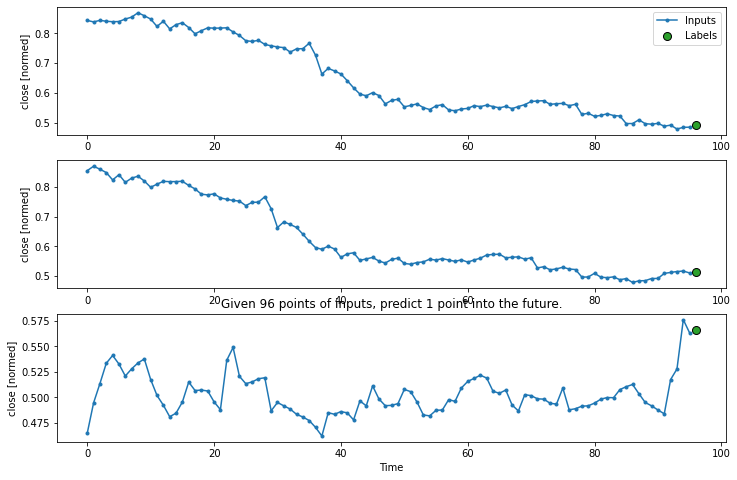

In [75]:
conv_window.plot()
plt.title("Given 96 points of inputs, predict 1 point into the future.")

In [76]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Input((conv_window.example[0].shape[1], conv_window.example[0].shape[2])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

multi_step_dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8256)              0         
                                                                 
 dense_7 (Dense)             (None, 32)                264224    
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
 reshape_1 (Reshape)         (None, 1, 1)              0         
                                                                 
Total params: 265,313
Trainable params: 265,313
Non-trainable params: 0
_________________________________________________________________


In [77]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 96, 86)
Output shape: (32, 1, 1)


In [78]:
history = compile_and_fit("multi_step", multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

9/9 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_absolute_error: 0.0272


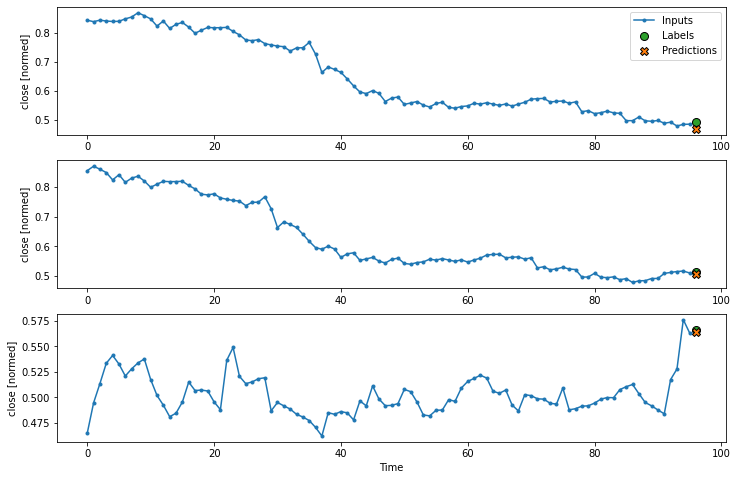

In [79]:
conv_window.plot(multi_step_dense)

In [80]:
pointsToShift = 1
inputWidth = int(POINT_IN_A_DAY - pointsToShift)

Total window size: 96
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label column name(s): ['close']

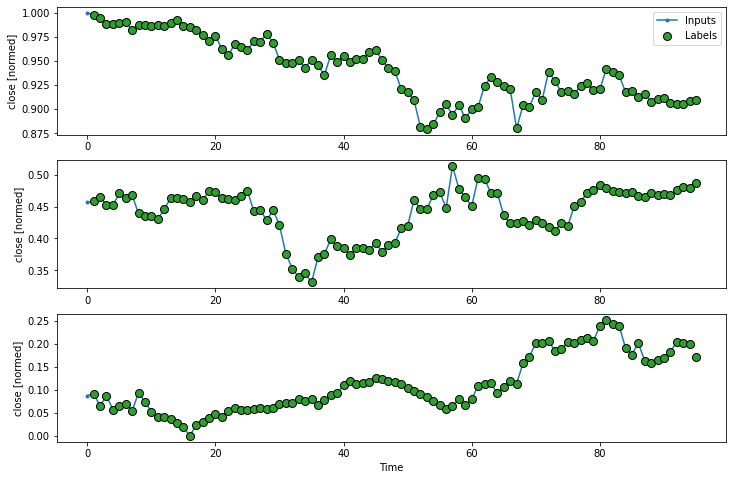

In [81]:
wide_window = WindowGenerator(
    input_width=inputWidth, label_width=inputWidth, shift=pointsToShift,
    label_columns=['close'])

wide_window.plot()
wide_window

In [82]:
wide_window.example[0].shape

TensorShape([32, 95, 86])

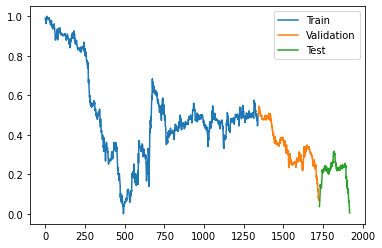

In [83]:
plt.plot(wide_window.getTrain.index, wide_window.getTrain['close'])
plt.plot(wide_window.getVal.index, wide_window.getVal['close'])
plt.plot(wide_window.getTest.index, wide_window.getTest['close'])

plt.legend(['Train', 'Validation', 'Test'])

In [40]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Input((wide_window.example[0].shape[1], wide_window.example[0].shape[2])),
    tf.keras.layers.LSTM(512, return_sequences=True),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 95, 512)           1226752   
                                                                 
 lstm_1 (LSTM)               (None, 95, 256)           787456    
                                                                 
 lstm_2 (LSTM)               (None, 95, 64)            82176     
                                                                 
 dense_3 (Dense)             (None, 95, 8)             520       
                                                                 
 dense_4 (Dense)             (None, 95, 1)             9         
                                                                 
Total params: 2,096,913
Trainable params: 2,096,913
Non-trainable params: 0
_________________________________________________________________


In [41]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 95, 86)
Output shape: (32, 95, 1)


In [42]:
history = compile_and_fit("lstm", lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

10/10 [==============================] - 0s 15ms/step - loss: 2.5712e-04 - mean_absolute_error: 0.0122


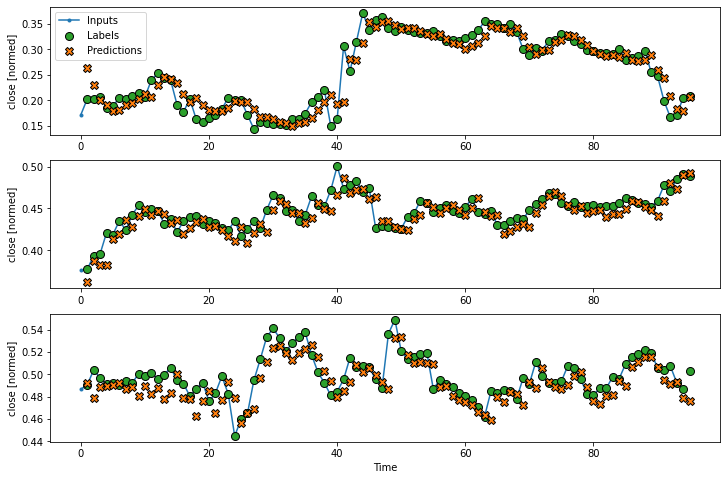

In [43]:
wide_window.plot(lstm_model)

In [44]:
bi_lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Input((wide_window.example[0].shape[1], wide_window.example[0].shape[2])),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(512, return_sequences=True)
    ),
        tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(256, return_sequences=True)
    ),
        tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    ),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

bi_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 95, 1024)         2453504   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 95, 512)          2623488   
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 95, 128)          295424    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 95, 8)             1032      
                                                                 
 dense_6 (Dense)             (None, 95, 1)             9         
                                                      

In [45]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', bi_lstm_model(wide_window.example[0]).shape)

Input shape: (32, 95, 86)
Output shape: (32, 95, 1)


In [46]:
history = compile_and_fit("bi_lstm", bi_lstm_model, wide_window)

IPython.display.clear_output()
val_performance['BI_LSTM'] = bi_lstm_model.evaluate(wide_window.val)
performance['BI_LSTM'] = bi_lstm_model.evaluate(wide_window.test, verbose=0)

10/10 [==============================] - 0s 20ms/step - loss: 1.2813e-04 - mean_absolute_error: 0.0090


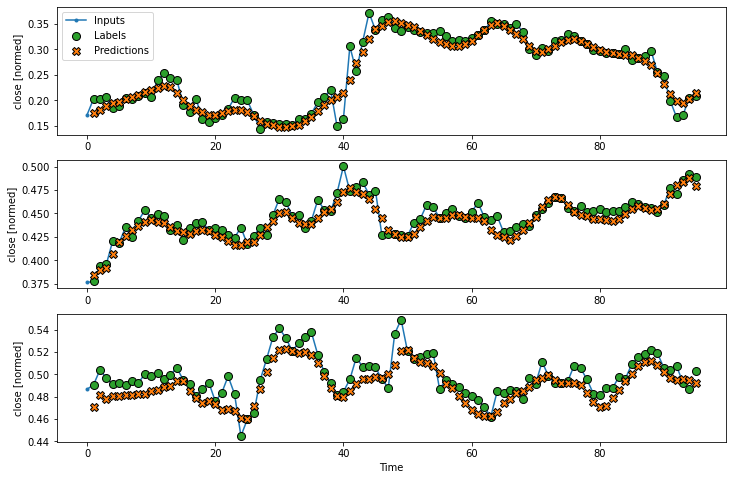

In [47]:
wide_window.plot(bi_lstm_model)

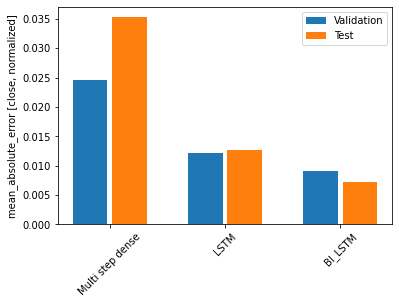

In [48]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [49]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Multi step dense: 0.0353
LSTM        : 0.0127
BI_LSTM     : 0.0072


In [50]:
test_df = wide_window.getTest
test_df

,open,high,low,close,volume,O-H,O-L,C-H,C-L,H-L,...,Trend_MI,Trend_SMA_12,Trend_SMA_50,Trend_SMA_100,Trend_STC,Trend_TRIX,Trend_VI_vortex_indicator_diff,Trend_VI_vortex_indicator_neg,Trend_VI_vortex_indicator_pos,Trend_WMA
1728,0.076959,0.079949,0.063538,0.037205,0.684611,0.108891,0.290351,0.306276,0.065545,0.358306,...,0.639867,0.056717,0.146998,0.181276,0.499998,0.083101,0.165845,0.720530,0.141205,0.045279
1729,0.036915,0.062341,0.068065,0.040957,0.576418,0.253746,0.039474,0.193305,0.060230,0.243485,...,0.647540,0.048516,0.141416,0.178100,0.374997,0.078926,0.182299,0.743429,0.188682,0.037764
1730,0.040513,0.055362,0.072744,0.056120,0.573792,0.186813,0.032456,0.075314,0.118689,0.182410,...,0.645879,0.043325,0.136079,0.175169,0.687498,0.079017,0.262754,0.681811,0.269852,0.033937
1731,0.055842,0.064086,0.080139,0.067375,0.585478,0.143856,0.075439,0.061088,0.139061,0.187296,...,0.642444,0.038052,0.131081,0.172247,0.843749,0.084652,0.311870,0.619170,0.297637,0.032711
1732,0.067105,0.069321,0.098702,0.077067,0.528493,0.104895,0.030702,0.036820,0.085031,0.114007,...,0.637842,0.035109,0.126457,0.169118,0.921875,0.095981,0.342974,0.625100,0.354894,0.033848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.064602,0.057741,0.094929,0.064249,0.365940,0.047952,0.038596,0.044351,0.034544,0.074919,...,0.714377,0.072848,0.139760,0.134306,0.134609,0.124837,0.109125,0.918155,0.218090,0.060999
1916,0.063663,0.050127,0.076064,0.042676,0.474921,0.005994,0.142982,0.119665,0.023029,0.137622,...,0.710507,0.063489,0.135348,0.131229,0.078969,0.115541,0.120811,0.823235,0.155102,0.051286
1917,0.042390,0.032202,0.065650,0.028138,0.441439,0.028971,0.084211,0.102929,0.001771,0.101792,...,0.701591,0.054946,0.130679,0.127875,0.045171,0.104831,0.057681,0.912295,0.126822,0.040678
1918,0.027843,0.014277,0.045427,0.014382,0.493304,0.008991,0.120175,0.082008,0.042516,0.118893,...,0.690075,0.044973,0.125647,0.124369,0.025283,0.092728,0.025869,0.914843,0.075753,0.029173


In [88]:
testing_window = WindowGenerator(
    input_width=95, label_width=0, shift=0, testing_df=test_df,
    label_columns=['close'])

testing_window

Total window size: 95
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Label indices: []
Label column name(s): ['close']

In [89]:
prediction = bi_lstm_model.predict(testing_window.getTestDf)
prediction

4/4 [==============================] - 2s 64ms/step


array([[[0.30658776],
        [0.31097144],
        [0.30304304],
        ...,
        [0.0823005 ],
        [0.09005047],
        [0.1030039 ]],

       [[0.15609005],
        [0.1616514 ],
        [0.17563932],
        ...,
        [0.25090754],
        [0.25439718],
        [0.25972402]],

       [[0.30399883],
        [0.3119912 ],
        [0.31004673],
        ...,
        [0.14482933],
        [0.15182926],
        [0.15923265]],

       ...,

       [[0.22380301],
        [0.22676234],
        [0.23111516],
        ...,
        [0.25718254],
        [0.26114517],
        [0.2581898 ]],

       [[0.22089095],
        [0.22466242],
        [0.22710939],
        ...,
        [0.22290671],
        [0.22640303],
        [0.22740301]],

       [[0.22920153],
        [0.23384216],
        [0.23717417],
        ...,
        [0.26315826],
        [0.2632906 ],
        [0.26148504]]], dtype=float32)